In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline 


In [13]:
train = pd.read_csv(r'C:\Users\Karthik Bharadhwaj\Python Datascience\DataSets\Decision Trees\LoanPred_train.csv')

In [14]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
train.shape

(614, 13)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


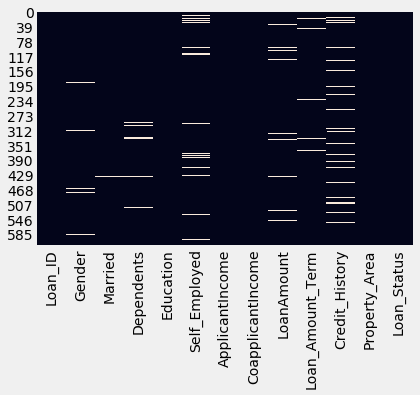

In [10]:
sns.heatmap(train.isnull(),cbar=False)

In [20]:
train_new =  train

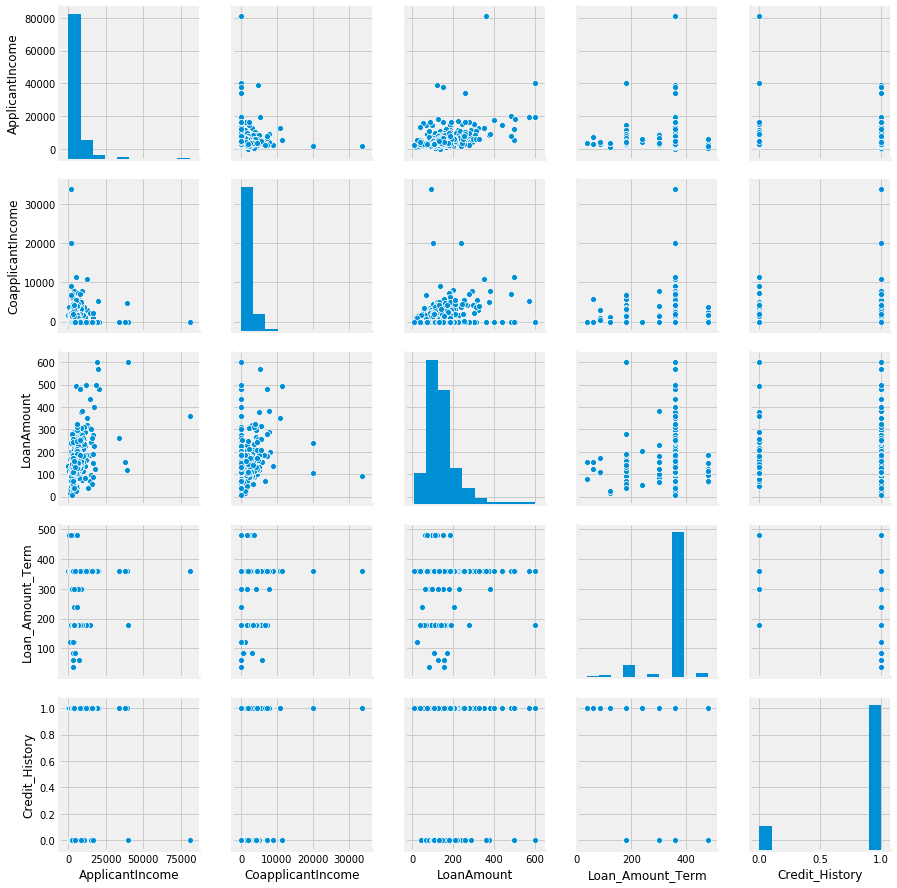

In [21]:
sns.pairplot(train_new.dropna())

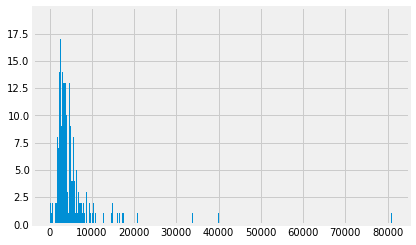

In [28]:
train['ApplicantIncome'].hist(bins=1000)

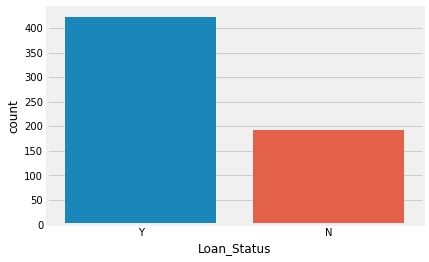

In [29]:
sns.countplot(train.Loan_Status)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


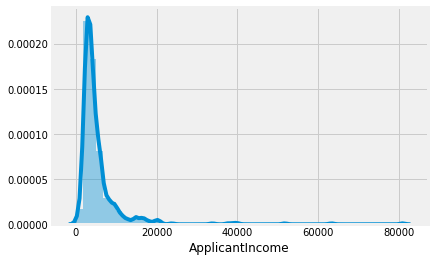

In [33]:
sns.distplot(train.ApplicantIncome)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


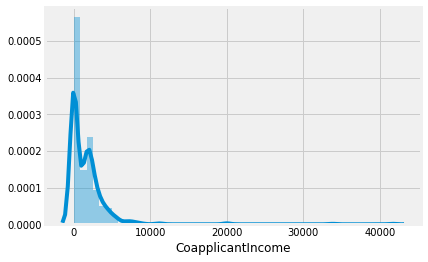

In [34]:
sns.distplot(train.CoapplicantIncome)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


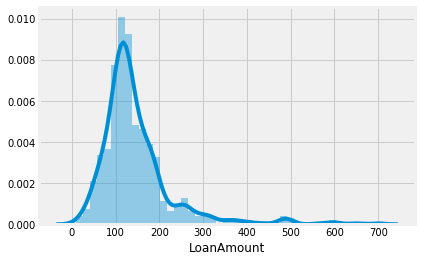

In [36]:
sns.distplot(train_new.LoanAmount.dropna())

In [38]:
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())

In [39]:
train.LoanAmount.isnull().sum()

0

In [40]:
Total_income = train.ApplicantIncome + train.CoapplicantIncome

In [42]:
train['Total_income'] = Total_income

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


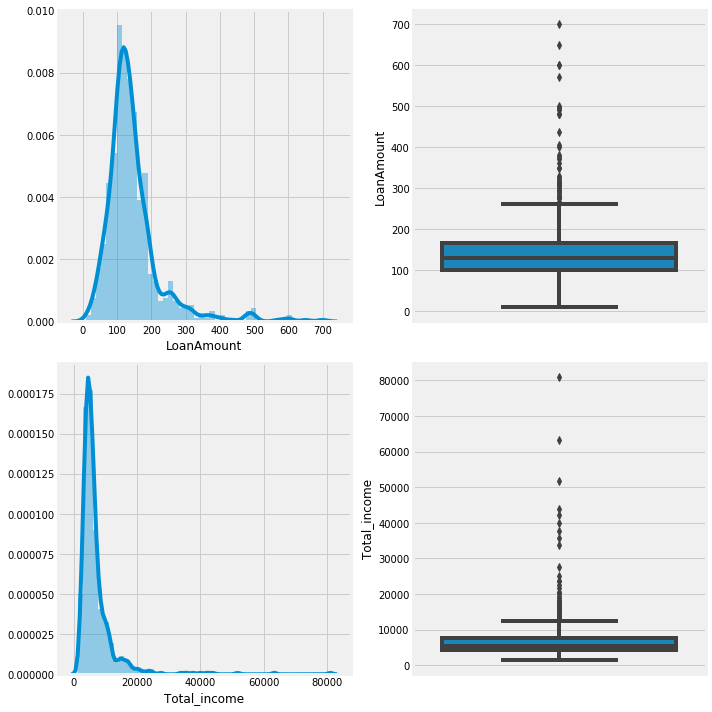

In [49]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(train.LoanAmount)
plt.subplot(2,2,2)
sns.boxplot(y=train.LoanAmount)
plt.subplot(2,2,3)
sns.distplot(train.Total_income)
plt.subplot(2,2,4)
sns.boxplot(y=train.Total_income)
plt.tight_layout()

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


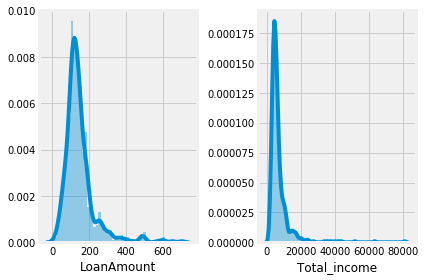

In [51]:
plt.subplot(1,2,1)
sns.distplot(train.LoanAmount)
plt.subplot(1,2,2)
sns.distplot(train.Total_income)
plt.tight_layout()

In [54]:
train['LoanAmount_log'] = np.log(train.LoanAmount)

In [55]:
train['Total_income_log'] = np.log(train.Total_income)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


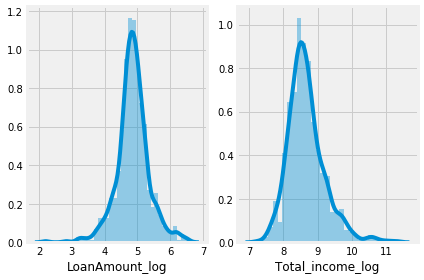

In [56]:
plt.subplot(1,2,1)
sns.distplot(train.LoanAmount_log)
plt.subplot(1,2,2)
sns.distplot(train.Total_income_log)
plt.tight_layout()

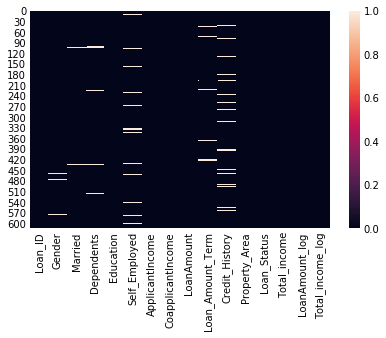

In [57]:
sns.heatmap(train.isnull())

Categorical columns:
===================
Gender 

Dependents 

Married

In [65]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)

In [62]:
train.Gender.mode()[0]

'Male'

In [66]:
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)

In [67]:
train.Married.fillna(train.Married.mode()[0],inplace=True)

In [72]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
LoanAmount_log        0
Total_income_log      0
dtype: int64

In [69]:
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)

In [71]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(),inplace=True)

## Coverting categorical variables into  numeric by encoding 

In [73]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'LoanAmount_log', 'Total_income_log'],
      dtype='object')

In [77]:
from sklearn.preprocessing import LabelEncoder 

cat_col = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

lable_encode = LabelEncoder()

for i in cat_col:
    train[i] = lable_encode.fit_transform(train[i])
    
    
train.dtypes    

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Total_income         float64
LoanAmount_log       float64
Total_income_log     float64
dtype: object

In [76]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,LoanAmount_log,Total_income_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,4.986426,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,4.852030,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,4.787492,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,4.948760,8.699515
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1,9613.0,5.587249,9.170872
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1,3849.0,4.553877,8.255569
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0,5540.0,5.062595,8.619750
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1,5532.0,5.123964,8.618305
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0,23809.0,5.855072,10.077819


In [81]:
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [82]:
train.Credit_History.isnull().sum()

0

## Build Decision Tree Model 

In [83]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [89]:
feature_cols1 = ['Credit_History','LoanAmount_log','Loan_Amount_Term']
y = train.Loan_Status

In [85]:
DT_model = DecisionTreeClassifier()

In [90]:
# fit the model 
DT_model.fit(train[feature_cols1],y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
train_predict = DT_model.predict(train[feature_cols1])

In [93]:
#Print Accuracy 
accuracy = metrics.accuracy_score(y,train_predict)
print('Accuracy : %s'% '{0:.3%}'.format(accuracy))

Accuracy : 89.414%


## Generate the Decision Tree 